# A stochastic model of ATP-producing pathways in Yeast

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
run ./Yeast_chem_model.py

# Main Figures

You can generate the figures in the main text of _Population-level heterogeneity as a reflection of mixed strategy: A computational perspective on the Crabtree effect_.

**Figures 2**, **3**, and **5** are generated using a simplified model of fermentation and respiration using Gillespie's next reaction method.

**Figure 4** is generated by solving the replicator eq. in MATLAB. The MATLAB code for solving the replicator eq. is included in the github respository for the manuscript.

## Figure 2

100%|██████████| 100000/100000 [00:04<00:00, 24385.53it/s]


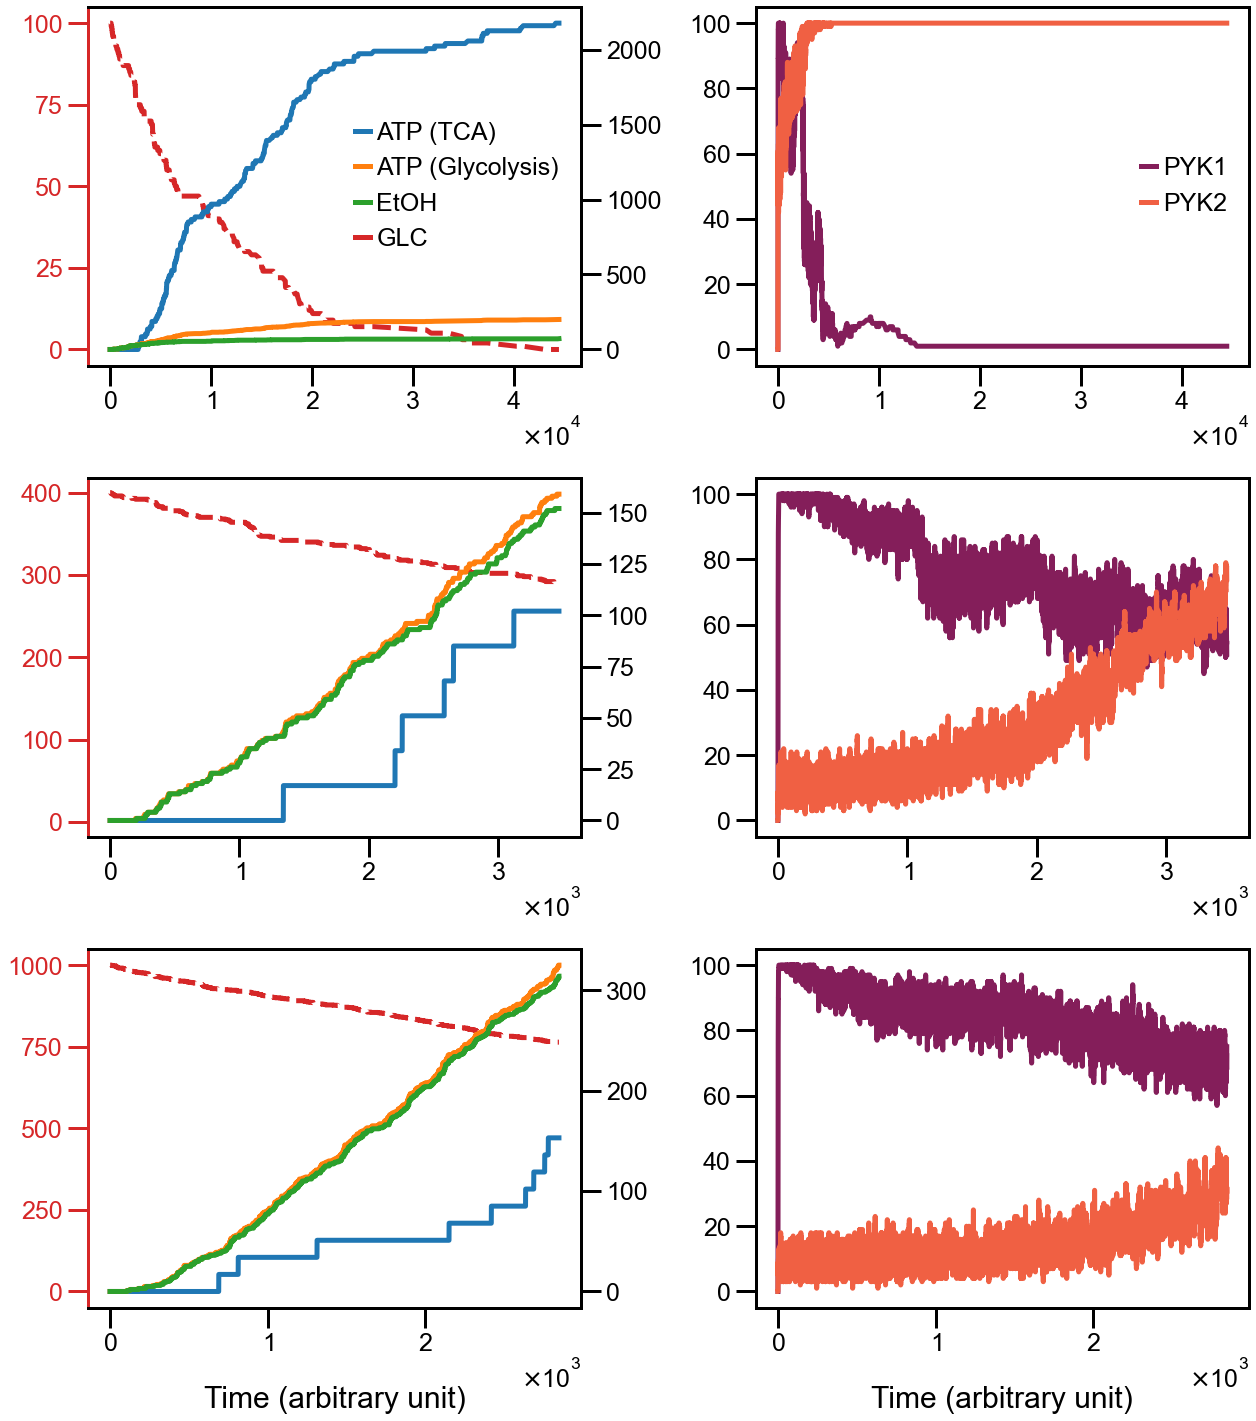

In [6]:
cols = sns.color_palette("tab10", n_colors=5)
cols_2 = sns.color_palette("rocket", n_colors=2)

fig, ax = plt.subplots(nrows=3,ncols=2, figsize=(18, 20),)
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 25})

t=8e5
#t=1e1
for j, par, t, lim in zip([(0,0),(1,0),(2,0)], [100, 400, 1000], [1e5, 1e5, 1e5], [(-5, 105), (-18, 418), (-50, 1050)]):
    for l in [0, 1]:
        ax[j[0]][l].tick_params(axis='x', which='both', bottom=True, top=False,
            labelbottom=True, size=20, width=3, direction='out', pad=5, colors='black')
        if l ==0:
            ax[j[0]][l].tick_params(axis='y', which='both', left=False, right=True,
                labelbottom=False, size=20, width=3, direction='out', pad=5, colors=cols[3])   
            ax[j[0]][l].yaxis.tick_right()
            ax[j[0]][l].spines['left'].set_color(cols[3])
            ax[j[0]][l].set_ylim(lim)
        else:
            ax[j[0]][l].tick_params(axis='y', which='both', left=True, right=False,
                labelbottom=False, size=20, width=3, direction='out', pad=5, colors='black')
            ax[j[0]][l].spines['left'].set_color('black')
        ax[j[0]][l].spines['right'].set_visible(True)
        ax[j[0]][l].spines['top'].set_visible(True)
        ax[j[0]][l].spines['bottom'].set_visible(True)
        ax[j[0]][l].spines['left'].set_visible(True)
        ax[j[0]][l].spines['left'].set_linewidth(3)
        ax[j[0]][l].spines['bottom'].set_linewidth(3)
        ax[j[0]][l].spines['right'].set_linewidth(3)
        ax[j[0]][l].spines['top'].set_linewidth(3)
        ax[j[0]][l].spines['bottom'].set_color('black')
        ax[j[0]][l].axes.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
        ax[j[0]][l].xaxis.major.formatter._useMathText = True

    glc = par
    sim = Yeast(GLC=glc, PEP=0, PYR=0 , ETHANOL=0, PYK1_in=100, PYK1_ac=0, PYK2_in=100, PYK2_ac=0, k_lst=[1e-4, 1e-3, 1e-3, 1e-4, 1, 1, 1, 1])
    sim.simulate(int(t),fixed_source=False, verbose=True)
    
    ax[j[0]][j[1]].errorbar(sim.time, sim.GLC_t, linestyle='dashed', lw=5, color=cols[3])
    ax[j[0]][j[1]].set_yticks(np.linspace(0, par, 5))

    #ax[j[0]][j[1]].set_ylabel('GLC', color=cols[3])
    
    ax2 = ax[j[0]][j[1]].twinx()
    ax2.errorbar(sim.time, sim.ATP_r_t, lw=5, label=r'ATP (TCA)', color=cols[0])
    ax2.errorbar(sim.time, sim.ATP_t, lw=5, label=r'ATP (Glycolysis)', color=cols[1])
    ax2.errorbar(sim.time, sim.ETHANOL_t, lw=5, label=r'EtOH', color=cols[2])
    
    ax2.errorbar(0, 0, lw=5, label=r'GLC', color=cols[3])
    
    
    ax2.tick_params(axis='y', which='both', left=False, right=True, labelbottom=False, size=20, width=3, direction='out', pad=5, colors='black')
    ax2.spines['left'].set_visible(False)
    ax2.yaxis.tick_right()
    
    if j == (0,0):
        ax2.legend(loc='best', shadow=False, fontsize='medium',framealpha=0., handlelength=0.6, handletextpad=0.25)
    
    ax[j[0]][j[1]+1].errorbar(sim.time, sim.PYK1_ac_t, lw=5, label=r'PYK1', color=cols_2[0])
    ax[j[0]][j[1]+1].errorbar(sim.time, sim.PYK2_ac_t, lw=5, label=r'PYK2', color=cols_2[1])

    ax[j[0]][j[1]+1].set_ylim(-5, 105)
    
#for i, label in enumerate(('A', 'B', 'C')):
#    ax[i][0].text(-.05, 1.2, label,fontsize=60, weight='bold', transform=ax[i][0].transAxes, va='top', ha='right')
    

ax[0][1].legend(loc='best', shadow=False, fontsize='medium',framealpha=0., handlelength=0.6, handletextpad=0.25)


plt.tight_layout()


ax[2][0].set_xlabel(r'Time (arbitrary unit)', fontsize= 30, labelpad=30)
ax[2][1].set_xlabel(r'Time (arbitrary unit)', fontsize= 30, labelpad=30)

#plt.show()
plt.savefig('../revised_figs/Fig2.eps', bbox_inches='tight', dpi=300)

## Figure 3

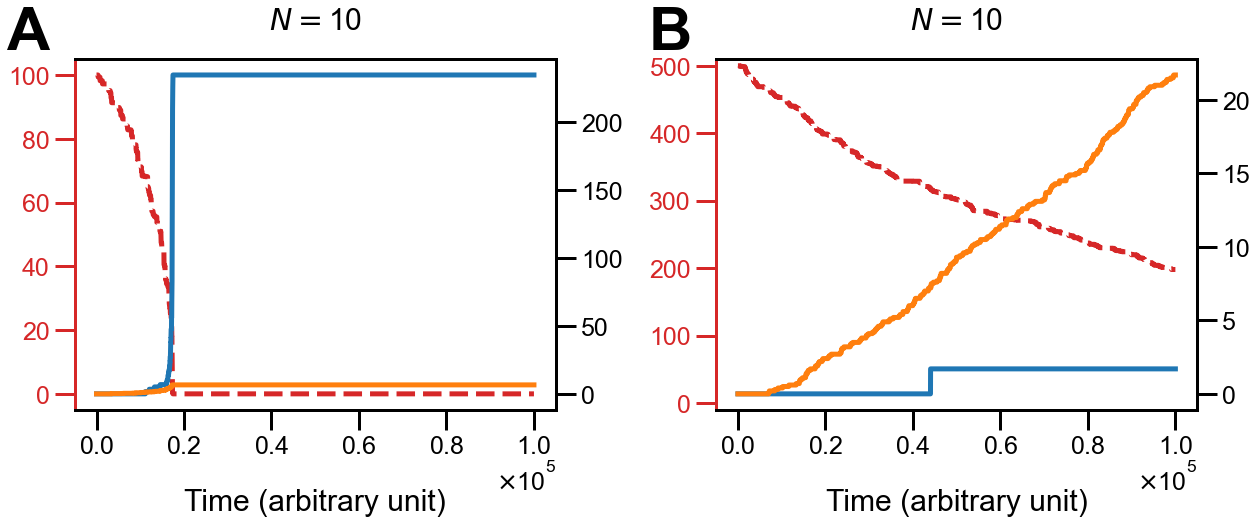

In [7]:
cols = sns.color_palette("tab10", n_colors=5)
cols_2 = sns.color_palette("rocket", n_colors=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18, 8),)
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 25})

t = 1e5
for i,glc,ylim in zip(ax, [100, 500], [(-5, 105),(-10, 510)]):
    i.tick_params(axis='x', which='both', bottom=True, top=False,
                  labelbottom=True, size=20, width=3, direction='out', pad=5, colors='black')
    i.tick_params(axis='y', which='both', left=False, right=True,
                  labelbottom=False, size=20, width=3, direction='out', pad=5, colors=cols[3])   
    i.yaxis.tick_right()
    i.spines['left'].set_color(cols[3])
    i.spines['right'].set_visible(True)
    i.spines['top'].set_visible(True)
    i.spines['bottom'].set_visible(True)
    i.spines['left'].set_visible(True)
    i.spines['left'].set_linewidth(3)
    i.spines['bottom'].set_linewidth(3)
    i.spines['right'].set_linewidth(3)
    i.spines['top'].set_linewidth(3)
    i.spines['bottom'].set_color('black')
    i.axes.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
    i.xaxis.major.formatter._useMathText = True
    
    N = 10
    cell = Yeast(GLC=glc, PEP=0, PYR=0 , ETHANOL=0, PYK1_in=100, PYK1_ac=0, PYK2_in=100, PYK2_ac=0, k_lst=[1e-4, 1e-3, 1e-3, 1e-4, 1, 1, 1, 1])
    pop = Population(cell, N, fixed_source=False)
    pop.simulate_pop(int(t), verbose=False)
    data = pop.stats
    
    i.errorbar(data['times'],  np.mean(data['Glc_ind'], axis=1), linestyle='dashed', lw=5, color=cols[3])
    
    ax2 = i.twinx()
    ax2.errorbar(data['times'],  np.mean(data['ATP_r_ind'], axis=1), lw=5, label=r'ATP (TCA)', color=cols[0])
    ax2.errorbar(data['times'],  np.mean(data['EtOH_ind'], axis=1), lw=5, label=r'EtOH', color=cols[1])
    
    ax2.tick_params(axis='y', which='both', left=False, right=True, labelbottom=False, size=20, width=3, direction='out', pad=5, colors='black')
    ax2.spines['left'].set_visible(False)
    ax2.yaxis.tick_right()
    
    if glc == 10:
        ax2.legend(loc='best', shadow=False, fontsize='medium',framealpha=0., handlelength=0.6, handletextpad=0.25)
    
    i.set_ylim(ylim)
    i.set_xlabel(r'Time (arbitrary unit)', fontsize= 30, labelpad=30)
    i.set_title(r'$N=$'+str(N), fontsize= 30, pad=30)
    
for i, label in enumerate(('A', 'B')):
    ax[i].text(-.05, 1.15, label,fontsize=60, weight='bold', transform=ax[i].transAxes, va='top', ha='right')
    
plt.tight_layout(h_pad=0.1)


#plt.show()
plt.savefig('../revised_figs/Fig3.eps', bbox_inches='tight', dpi=300)

## Figure 4

In [3]:
rep_data = pd.read_csv('replicator_results_2.txt')

In [4]:
rep_data.head(5)

,t,r,f,g
0,0.000000,0.50000,0.50000,5.0000
1,0.000265,0.48762,0.51238,4.9865
2,0.000530,0.47571,0.52429,4.9726
3,0.000795,0.46426,0.53574,4.9585
4,0.001060,0.45327,0.54673,4.9441


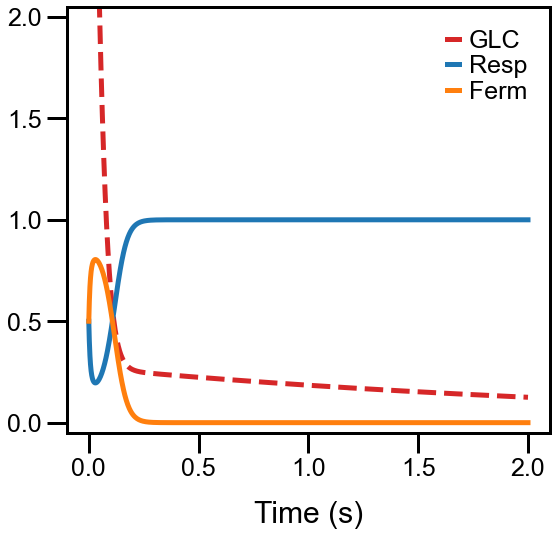

In [5]:
cols = sns.color_palette("tab10", n_colors=5)

fig = plt.figure(figsize=(8,8))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 25})
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

end=430
ax.errorbar(rep_data.iloc[:, 0][:end], rep_data.iloc[:, 3][:end], lw=5,color=cols[3],linestyle='dashed')
ax.errorbar(0,0, lw=5,color=cols[3], label=r'GLC')
ax.errorbar(rep_data.iloc[:, 0][:end], rep_data.iloc[:, 1][:end], lw=5, label='Resp', color=cols[0])
ax.errorbar(rep_data.iloc[:, 0][:end], rep_data.iloc[:, 2][:end], lw=5, label='Ferm', color=cols[1])



handles, labels = ax.get_legend_handles_labels()

ax.legend(handles,labels, loc='best', fontsize='medium', \
          handlelength=0.5, handletextpad=0.4, framealpha=0., labelspacing=0.1,\
          numpoints=1, markerscale=0.3, fancybox=False, edgecolor='white')

plt.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=5, colors='black')
plt.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=True, size=20, width=3, direction='out', pad=5, colors='black')
plt.xlabel(r'Time (s)', fontsize= 30, labelpad=20)
plt.tight_layout()

plt.ylim(-0.05, 2.05)
#plt.xlim(0, 10)
plt.savefig('./Fig4.eps', bbox_inches='tight', dpi=300)

## Figure 5

### Simulating pop with mixed strategy:

In [174]:
glc =100
sys = Yeast(GLC=glc, PEP=0, PYR=0 , ETHANOL=0, PYK1_in=100, PYK1_ac=0, PYK2_in=100, PYK2_ac=0, k_lst=[1e-4, 1e-3, 1e-3, 1e-4, 1, 1, 1, 1])

t = 1e5
N = 100
pop_switch = Population(sys, N, fixed_source=False)
pop_switch.simulate_pop(int(t), verbose=False)
EtOH_with_switch = [i.ETHANOL.n for i in pop_switch.pop]
R_with_switch = [i.ATP_r.n for i in pop_switch.pop]

print(np.mean(EtOH_with_switch))
print(np.mean(R_with_switch))

data_switch = pop_switch.stats


x= np.random.choice(pop_switch.pop, size=10)
sub_pop_switch_1 = Population(sys, N, fixed_source=False)
sub_pop_switch_1.change_pop(x)
sub_pop_switch_1.simulate_pop(int(t), verbose=False)
sub_EtOH_with_switch_1 = [i.ETHANOL.n for i in sub_pop_switch_1.pop]
sub_data_switch_1 = sub_pop_switch_1.stats

x= np.random.choice(pop_switch.pop, size=10)
sub_pop_switch_2 = Population(sys, N, fixed_source=False)
sub_pop_switch_2.change_pop(x)
sub_pop_switch_2.simulate_pop(int(t), verbose=False)
sub_EtOH_with_switch_2 = [i.ETHANOL.n for i in sub_pop_switch_2.pop]
sub_data_switch_2 = sub_pop_switch_1.stats

x= np.random.choice(pop_switch.pop, size=10)
sub_pop_switch_3 = Population(sys, N, fixed_source=False)
sub_pop_switch_3.change_pop(x)
sub_pop_switch_3.simulate_pop(int(t), verbose=False)
sub_EtOH_with_switch_3 = [i.ETHANOL.n for i in sub_pop_switch_3.pop]
sub_data_switch_3 = sub_pop_switch_1.stats

1.45
25.33


### Simulating pop with subpopulations uitlizing distinct strategies:

In [175]:
glc =100
sys = Yeast(GLC=glc, PEP=0, PYR=0 , ETHANOL=0, PYK1_in=100, PYK1_ac=0, PYK2_in=100, PYK2_ac=0, k_lst=[1e-4, 1e-3, 1e-3, 1e-4, 1, 1, 1e-4, 1e-4], regulation=False)
sys.set_strat_prop(40)

t = 8e3

N = 100
pop = Population(sys, N, fixed_source=False)
pop.simulate_pop(int(t), verbose=False)
EtOH_without_switch = [i.ETHANOL.n for i in pop.pop]
R_without_switch = [i.ATP_r.n for i in pop.pop]

print(np.mean(EtOH_without_switch))
print(np.mean(R_without_switch))

data_without_switch = pop.stats

t = 1e5

x= np.random.choice(pop.pop, size=10)
sub_pop_no_switch_1 = Population(sys, N, fixed_source=False)
sub_pop_no_switch_1.change_pop(x)
sub_pop_no_switch_1.simulate_pop(int(t), verbose=False)
sub_EtOH_no_switch_1 = [i.ETHANOL.n for i in sub_pop_no_switch_1.pop]
sub_data_no_switch_1 = sub_pop_no_switch_1.stats

x= np.random.choice(pop.pop, size=10)
sub_pop_no_switch_2 = Population(sys, N, fixed_source=False)
sub_pop_no_switch_2.change_pop(x)
sub_pop_no_switch_2.simulate_pop(int(t), verbose=False)
sub_EtOH_no_switch_2 = [i.ETHANOL.n for i in sub_pop_no_switch_2.pop]
sub_data_no_switch_2 = sub_pop_no_switch_2.stats

x= np.random.choice(pop.pop, size=10)
sub_pop_no_switch_3 = Population(sys, N, fixed_source=False)
sub_pop_no_switch_3.change_pop(x)
sub_pop_no_switch_3.simulate_pop(int(t), verbose=False)
sub_EtOH_no_switch_3 = [i.ETHANOL.n for i in sub_pop_no_switch_3.pop]
sub_data_no_switch_3 = sub_pop_no_switch_3.stats

0.81
20.23


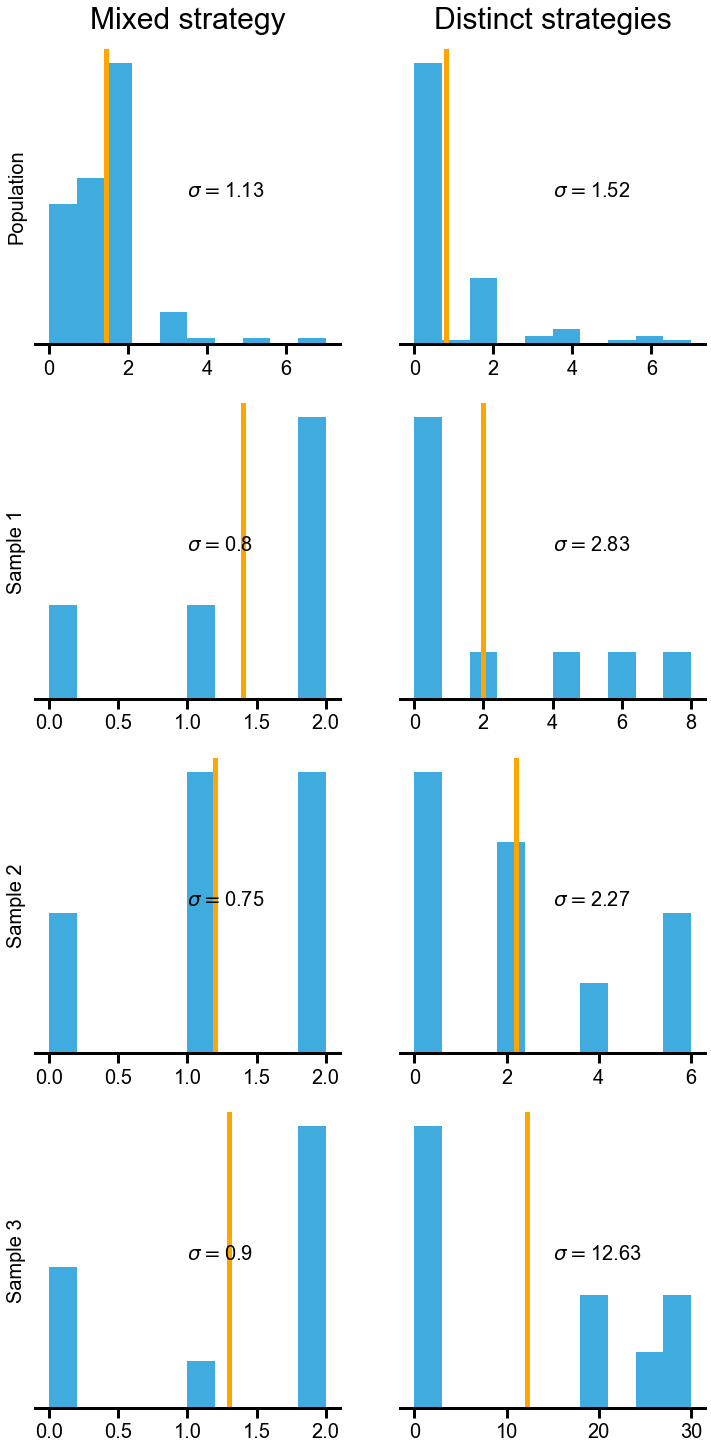

In [176]:
fig, ax = plt.subplots(nrows=4 ,ncols=2, figsize=(12, 25))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 20})

for i in [0,1,2,3]:
    for j in [0,1]:
        ax[i][j].tick_params(axis='x', which='both', bottom=True, top=False,
                             labelbottom=True, size=10, width=3, direction='out', pad=5, colors='black')
        ax[i][j].tick_params(axis='y', which='both', left=False, right=False,
                             labelbottom=False, size=0, width=0, direction='out', pad=5, colors='black')
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['bottom'].set_visible(True)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].spines['left'].set_linewidth(3)
        ax[i][j].spines['bottom'].set_linewidth(3)
        ax[i][j].spines['right'].set_linewidth(3)
        ax[i][j].spines['top'].set_linewidth(3)
        ax[i][j].spines['bottom'].set_color('black')
        ax[i][j].spines['left'].set_color('black')
        ax[i][j].set_yticklabels([])
        #ax[i][j].set_ylim(0, 0.4)
            
font_size = 20

# mixed
        
ax[0][0].hist(EtOH_with_switch, bins=10, color='#40ABDF')
x=np.mean(EtOH_with_switch)
ax[0][0].axvline(x, lw=5, color='orange')
y_min, y_max = ax[0][0].get_ylim()
x_min, x_max = ax[0][0].get_xlim()
ax[0][0].text(np.mean([x_min, x_max]),y_max/2, r'$\sigma=$' + str(np.round(np.std(EtOH_with_switch), decimals=2)))
ax[0][0].set_title(r"Mixed strategy", fontsize= 30, pad=20)

ax[1][0].hist(sub_EtOH_with_switch_1, bins=10, color='#40ABDF')
x=np.mean(sub_EtOH_with_switch_1)
ax[1][0].axvline(x, lw=5, color='orange')
y_min, y_max = ax[1][0].get_ylim()
x_min, x_max = ax[1][0].get_xlim()
ax[1][0].text(np.mean([x_min, x_max]),y_max/2, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_with_switch_1), decimals=2)))


ax[2][0].hist(sub_EtOH_with_switch_2, bins=10, color='#40ABDF')
x=np.mean(sub_EtOH_with_switch_2)
ax[2][0].axvline(x, lw=5, color='orange')
y_min, y_max = ax[2][0].get_ylim()
x_min, x_max = ax[2][0].get_xlim()
ax[2][0].text(np.mean([x_min, x_max]),y_max/2, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_with_switch_2), decimals=2)))


ax[3][0].hist(sub_EtOH_with_switch_3, bins=10, color='#40ABDF')
x=np.mean(sub_EtOH_with_switch_3)
ax[3][0].axvline(x, lw=5, color='orange')
y_min, y_max = ax[3][0].get_ylim()
x_min, x_max = ax[3][0].get_xlim()
ax[3][0].text(np.mean([x_min, x_max]), y_max/2, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_with_switch_3), decimals=2)))

# distinct

ax[0][1].hist(EtOH_without_switch, bins=10, color='#40ABDF')
x=np.mean(EtOH_without_switch)
ax[0][1].axvline(x, lw=5, color='orange')
y_min, y_max = ax[0][1].get_ylim()
x_min, x_max = ax[0][1].get_xlim()
ax[0][1].set_title("Distinct strategies", fontsize= 30, pad=20)
ax[0][1].text(np.mean([x_min, x_max]),y_max/2, r'$\sigma=$' + str(np.round(np.std(EtOH_without_switch), decimals=2)))

ax[1][1].hist(sub_EtOH_no_switch_1, bins=10, color='#40ABDF')
x=np.mean(sub_EtOH_no_switch_1)
ax[1][1].axvline(x, lw=5, color='orange')
y_min, y_max = ax[1][1].get_ylim()
x_min, x_max = ax[1][1].get_xlim()
ax[1][1].text(np.mean([x_min, x_max]),y_max/2, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_no_switch_1), decimals=2)))

ax[2][1].hist(sub_EtOH_no_switch_2, bins=10, color='#40ABDF')
x=np.mean(sub_EtOH_no_switch_2)
ax[2][1].axvline(x, lw=5, color='orange')
y_min, y_max = ax[2][1].get_ylim()
x_min, x_max = ax[2][1].get_xlim()
ax[2][1].text(np.mean([x_min, x_max]),y_max/2, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_no_switch_2), decimals=2)))


ax[3][1].hist(sub_EtOH_no_switch_3, bins=10, color='#40ABDF')
x=np.mean(sub_EtOH_no_switch_3)
ax[3][1].axvline(x, lw=5, color='orange')
y_min, y_max = ax[3][1].get_ylim()
x_min, x_max = ax[3][1].get_xlim()
ax[3][1].text(np.mean([x_min, x_max]),y_max/2, r'$\sigma=$' + str(np.round(np.std(sub_EtOH_no_switch_3), decimals=2)))



ax[0][0].set_ylabel(r"Population", fontsize= font_size)#, pad=20)
ax[1][0].set_ylabel(r"Sample 1", fontsize= font_size)#, pad=20)
ax[2][0].set_ylabel(r"Sample 2", fontsize= font_size)#, pad=20)
ax[3][0].set_ylabel(r"Sample 3", fontsize= font_size)#, pad=20)


plt.subplots_adjust(hspace=0.2)            


#plt.show()
plt.savefig('./Fig5.eps', bbox_inches='tight', dpi=300)